# Klasyfikacja automatów komórkowych

 <em>Michał Wójcik, Stanisław Kurzątkowski</em>

### Definicje funkcji

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def num_to_rule(num, size):
    n = int(2**size)
    rule = np.zeros(n)
    for i in range(n):
        num, r = divmod(num, 2)
        rule[i] = r
    return rule

In [3]:
def num_of_ones_to_random_rule(num, size):
    n = int(2**size)
    rule = np.zeros(n)
    indices = [i for i in range(n)]
    random.shuffle(indices)

    rule[indices[:num]] = 1
    return rule   

In [4]:
def apply_rule(current, rule, rule_size):
    size = len(current)
    after = np.zeros(size)
    rule_count = np.zeros(2**rule_size)
    shift = int(rule_size/2)    
    for i in range(size):
        num = 0
        for j in range(rule_size):            
            num += 2**(rule_size-j-1) * current[(i-shift+j) % size]
        after[i] = rule[int(num)]
        rule_count[int(num)] += 1
    entropy = 0
    for i in range(2**(rule_size)):
        if rule_count[i] == 0:
            pass
        else:
            entropy -= rule_count[i]/size * np.log2(rule_count[i]/size)
    return after, entropy
        

In [5]:
def calculate_langton(rule):
    return sum(rule)/len(rule)

In [6]:
def evolution_given_rule_given_init(rule, rule_size, length, iters, init):
    # funkcja zwracająca ewolucję automatu i wykres jego entropii
    
    langton_coeff = calculate_langton(rule)
    domain = np.zeros((iters, length))
    domain[0] = init
    entropy = np.zeros(iters-1)
    for i in range(iters-1):
        domain[i+1], entropy[i] = apply_rule(domain[i], rule, rule_size)
    return domain, entropy, langton_coeff

In [7]:
def evolution(num_of_ones, rule_size, length, iters):
    # funkcja zwracająca współczynnik Langtona automatu i jego uśrednioną entropię
    
    rule = num_of_ones_to_random_rule(num_of_ones, rule_size)
    domain = np.zeros((iters, length))
    domain[0] = np.random.randint(2, size=length)
    entropy = np.zeros(iters-1)
    for i in range(iters-1):
        domain[i+1], entropy[i] = apply_rule(domain[i], rule, rule_size)
    langton = num_of_ones/(2**rule_size)
    mean_entropy = np.mean(entropy[-100:])
    return langton, mean_entropy

# Tworzenie i przebieg automatu

### Definiowanie reguły lokalnej

In [8]:
rule_size = 7
num_of_ones = 64

# regułę można wpisać ręcznie:
rule = [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
 0., 1., 0., 0., 0., 1., 1., 0.]

# inne opcje:
# rule = num_of_ones_to_random_rule(num_of_ones, rule_size)

# wyświetlanie heksadecymalnego zapisu reguły
rule1 = [int(x) for x in rule]
rule1 = [str(x) for x in rule1]
binary_string = "".join(rule1)
decimal_representation = int(binary_string, 2)
hexadecimal_string = hex(decimal_representation)
print(hexadecimal_string)

0x51a12a21471004380434510010542546


### Ustalanie stanu początkowego

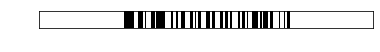

In [9]:
length = 1000
init_size = 100
iters = 1000


sample = np.random.randint(2, size=init_size)
init = np.zeros((1,length))
init[0][int(length/2-init_size/2):int(length/2+init_size/2)] = sample

plt.yticks(color='w')
plt.xticks(color='w')
plt.tick_params(left = False)
plt.tick_params(bottom = False)
plt.imshow(init[:,int(length/2-init_size):int(length/2+init_size)], cmap='gray_r', aspect=10, interpolation='none') # [y, x]
plt.show()

In [10]:
# symulacja wraz z obliczaniem czasu wykonywania

start = time.time()
L, E, langton_coeff = evolution_given_rule_given_init(rule, rule_size, length, iters, init)   
end = time.time()
seconds = end - start
print(f'Wykonano w {seconds:.2f} sekund.')

Wykonano w 9.39 sekund.


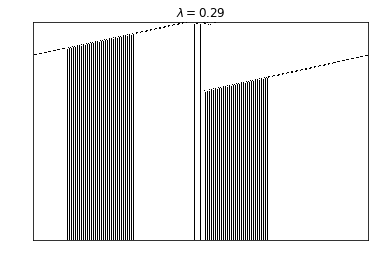

In [11]:
# wyświetlanie przebiegu stanu automatu

fig, ax = plt.subplots() 
plt.yticks(color='w')
plt.xticks(color='w')
plt.tick_params(left = False)
plt.tick_params(bottom = False)
ax.set_title(f'$\lambda = {langton_coeff:.2}$', fontsize=12) 
plt.imshow(L[:,:], cmap='gray_r', aspect='auto', interpolation='none') 
plt.savefig(f"CA_{langton_coeff:.2}_{np.mean(E[-100:]):.3}_1.png")

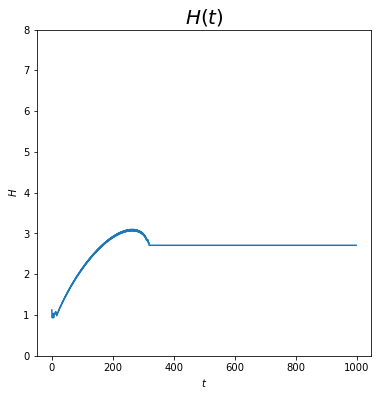

In [12]:
# wykres entropii od iteracji

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('$H(t)$', fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$H$")
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 8])

ax.plot(E[:])
plt.savefig(f"CA_{langton_coeff:.2}_{np.mean(E[-100:]):.3}_1_ENTROPY.png")
plt.show()

## Tworzenie wykresu H(L)

In [ ]:
rule_size = 5
length = 50
iters = 10
repetitions = 10

langton_table = []
entropy_table = []

start = time.time()

for l in range(2**(rule_size-1)): 
    print(f'L = {l}/{2**(rule_size-1)}')
    for _ in range(repetitions):
        L, E = evolution(l, rule_size, length, iters)
        langton_table.append(L)
        entropy_table.append(E)
        
end = time.time()
seconds = end - start
print(f'Done in {seconds:.2f} seconds.')